# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s): Mahdi Akbari and Marzie Faramarzzadeh

Student number(s): 2208094 and 2210301

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data. BECAUSE ACC IS EACH 10 MILI-SEC AND DC IS EACH 1 SEC SO IN EACH 5 SEC (5000 MILI-SEC) WE HAVE 500 ACC AND 5 DC.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [2]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [3]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [4]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


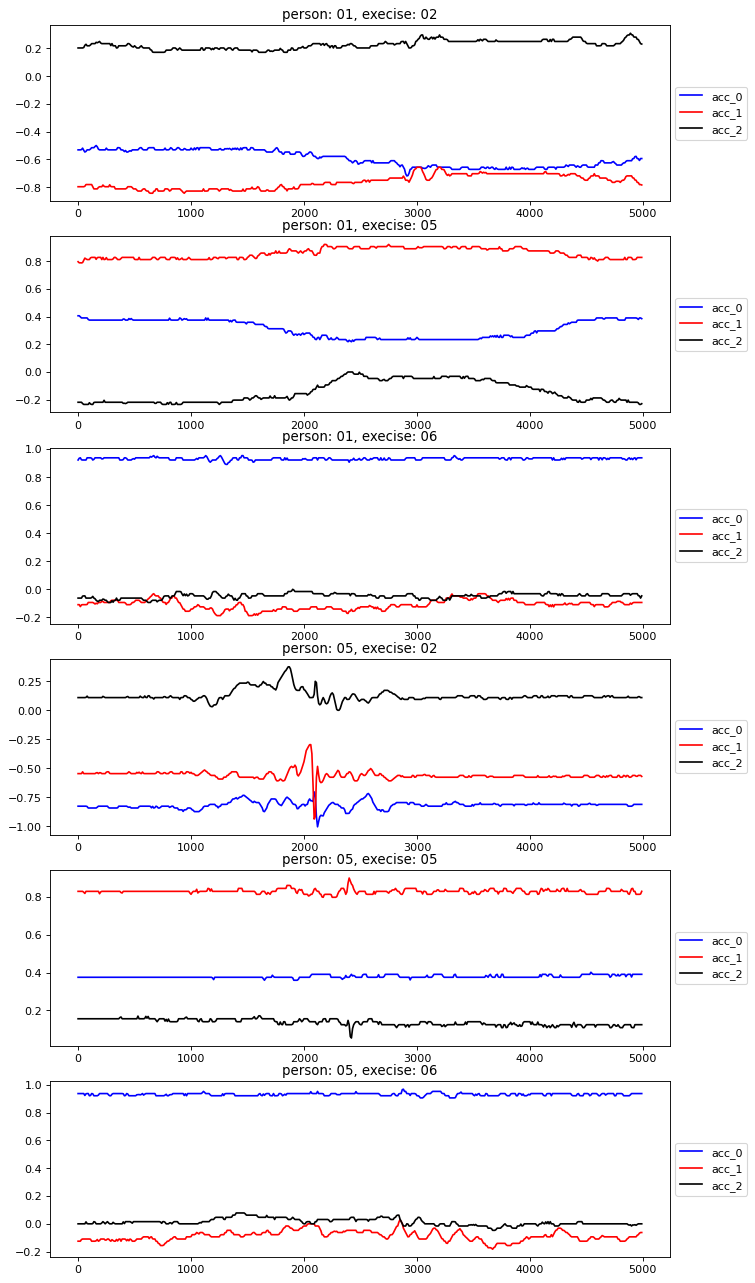

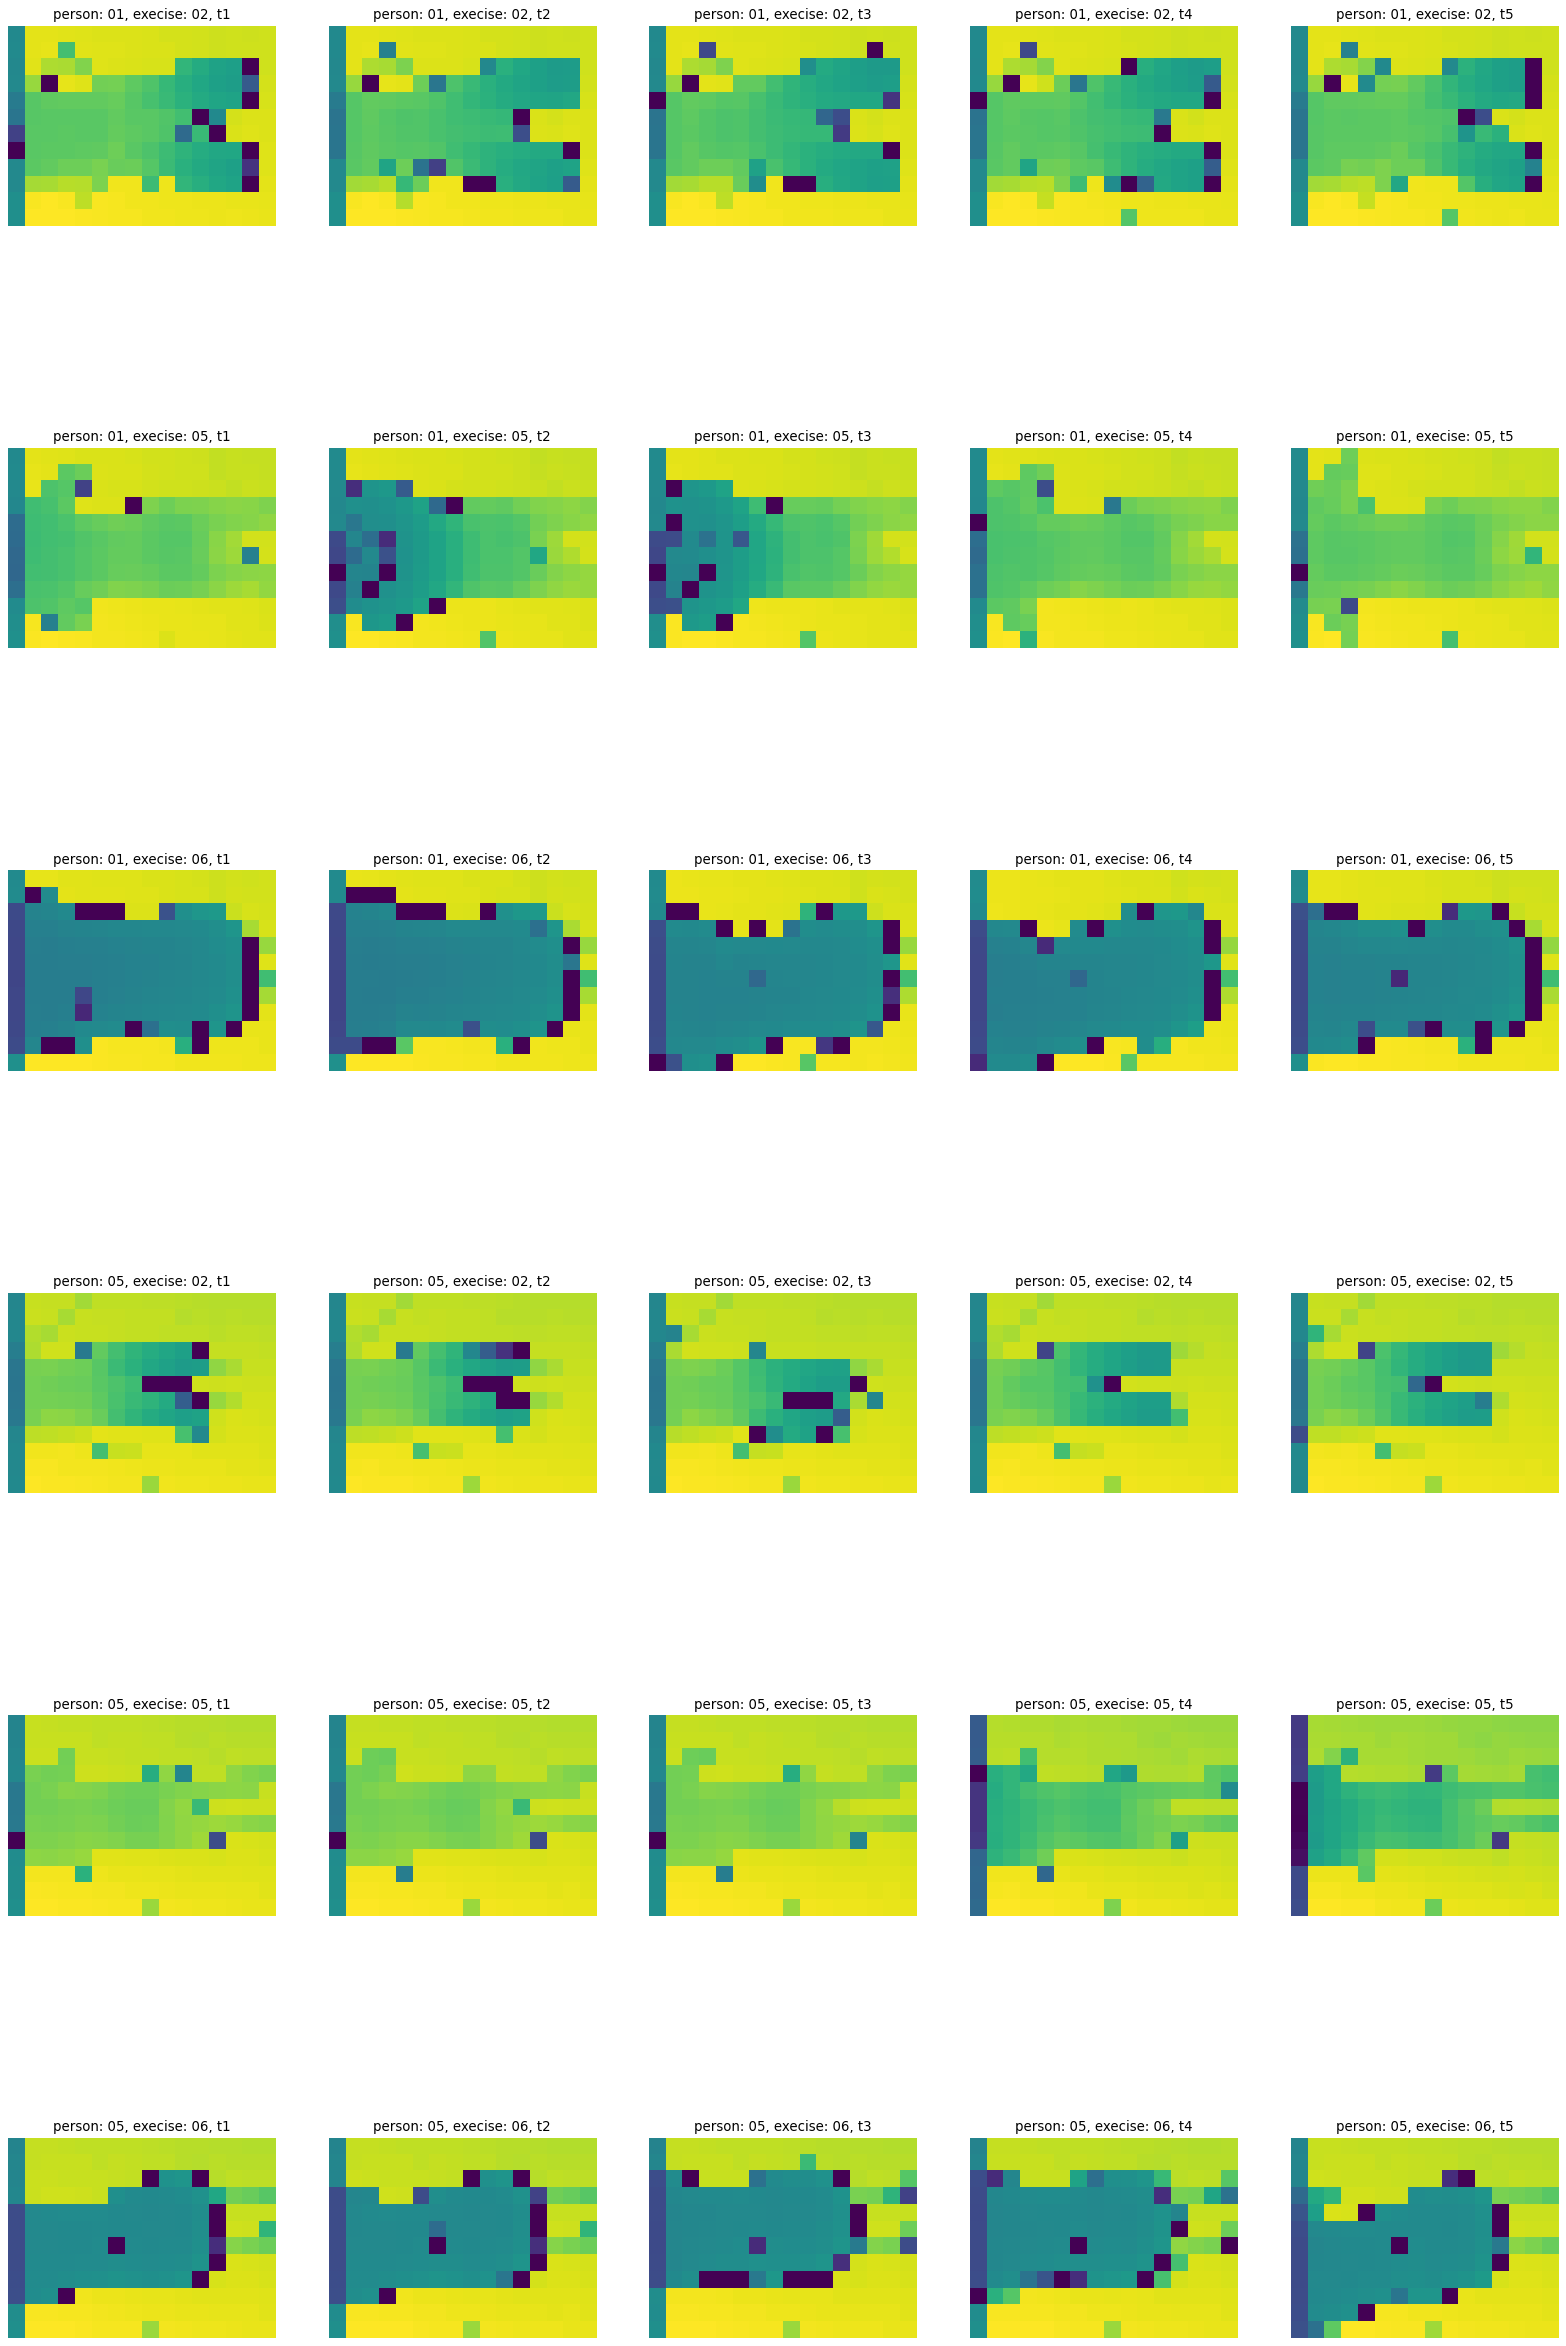

In [5]:
# 1.1. Visualize selected samples for both modalities

### Your code begins here ###
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sensors = ['acc', 'dc'] # acc and dc
subject_ids = ['01','05'] #1 and 5
exercise_ids = ['02', '05', '06'] # 2, 5 and 6

fig_t, ax_t = plt.subplots(6, 1, figsize = (10, 20), dpi=80)

fig_img, ax_img = plt.subplots(6, 5, figsize = (25, 40), dpi=80)

for sensor in sensors:
    subplot_conter = 0
    for subject_id in subject_ids:
        for exercise_id in exercise_ids:
            
            des = (df_records_windowed['sensor'] == sensor) & (df_records_windowed['subject_id'] == subject_id) & (df_records_windowed['exercise_id'] == exercise_id) & (df_records_windowed['window_idx'] == 0)           
            df_plot = df_records_windowed["df"].iloc[df_records_windowed.loc[des, :].index[0]]
                    
            if sensor == 'acc':
                
                ax_t[subplot_conter].plot(df_plot['time'],df_plot['acc_0'], label = 'acc_0', color = 'blue')
                ax_t[subplot_conter].plot(df_plot['time'],df_plot['acc_1'], label = 'acc_1', color = 'red')
                ax_t[subplot_conter].plot(df_plot['time'],df_plot['acc_2'], label = 'acc_2', color = 'black')
                ax_t[subplot_conter].set_title('person: ' + subject_id + ', execise: ' + exercise_id )
                ax_t[subplot_conter].legend(loc='center left', bbox_to_anchor=(1, 0.5))

                subplot_conter += 1
                
            else:
                ax_img[subplot_conter, 0].imshow(np.array(df_plot.iloc[0, 1:]).reshape(12,16))
                ax_img[subplot_conter, 0].axis('off')
                ax_img[subplot_conter, 0].set_title('person: ' + subject_id + ', execise: ' + exercise_id + ', t1')
                
                ax_img[subplot_conter, 1].imshow(np.array(df_plot.iloc[1, 1:]).reshape(12,16))
                ax_img[subplot_conter, 1].axis('off')
                ax_img[subplot_conter, 1].set_title('person: ' + subject_id + ', execise: ' + exercise_id + ', t2')
                
                ax_img[subplot_conter, 2].imshow(np.array(df_plot.iloc[2, 1:]).reshape(12,16))
                ax_img[subplot_conter, 2].axis('off')
                ax_img[subplot_conter, 2].set_title('person: ' + subject_id + ', execise: ' + exercise_id + ', t3')
                
                ax_img[subplot_conter, 3].imshow(np.array(df_plot.iloc[3, 1:]).reshape(12,16))
                ax_img[subplot_conter, 3].axis('off')
                ax_img[subplot_conter, 3].set_title('person: ' + subject_id + ', execise: ' + exercise_id + ', t4')
                
                ax_img[subplot_conter, 4].imshow(np.array(df_plot.iloc[4, 1:]).reshape(12,16))
                ax_img[subplot_conter, 4].axis('off')
                ax_img[subplot_conter, 4].set_title('person: ' + subject_id + ', execise: ' + exercise_id + ', t5')
                
            
                subplot_conter += 1
### Your code ends here ###

In [6]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments
import warnings
warnings.filterwarnings("ignore")

fil_wins = [] 
fil_ids = []
df_filt_train = pd.DataFrame()
df_filt_test = pd.DataFrame()

subject_ids = list(set(df_records_windowed['subject_id']))
subject_ids.sort()

### Your code begins here ###
for window in range(56):
    for subject_id in subject_ids:
        df = df_records_windowed.loc[(df_records_windowed['window_idx'] == window) &
                                     (df_records_windowed['subject_id'] == subject_id)
                                     , :]
            
        if df.shape[0] > 0:
            df['tri_str'] = df['trial'].astype(str)

            df['ex_tri'] = df[['exercise_id', 'tri_str']].agg('-'.join, axis=1)

            counter = set(df.loc[df['sensor'] == 'dc','ex_tri']).intersection(df.loc[df['sensor'] == 'acc','ex_tri'])
            
            if counter != set(df['ex_tri']):
                print('in window number {} and subject_id {}, dc and acc do not have pair'.format(window,subject_id)) 

            df_f = pd.DataFrame()
            
            for i in counter:
                df_f = df_f.append(df.loc[df['ex_tri'] == i, :])
                    
            if subject_id not in subject_ids[7:10]:
                df_filt_train = df_filt_train.append(df_f)
                
            elif subject_id in subject_ids[7:10]: 
                df_filt_test = df_filt_test.append(df_f)
                
### Your code ends here ###

in window number 29 and subject_id 02, dc and acc do not have pair


# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

In [7]:
def pca_lda_acc(acc, n_comp = 5, need_lda = True):
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    pca = PCA(n_components = n_comp)
    lda = LinearDiscriminantAnalysis(n_components = n_comp)

    # input is acc sensor data
    # output is three arrays (length of input acc, 5) for acc0, 1, 2
    
    label = acc['exercise_id'] #exercise and trial are classes we want to predict

    acc0 = [acc['df_z'].iloc[i][:,1] for i in range(acc['df_z'].shape[0])]
    acc1 = [acc['df_z'].iloc[i][:,2] for i in range(acc['df_z'].shape[0])]
    acc2 = [acc['df_z'].iloc[i][:,3] for i in range(acc['df_z'].shape[0])]

    acc0_pca = pca.fit_transform(acc0)
    acc1_pca = pca.fit_transform(acc1)
    acc2_pca = pca.fit_transform(acc2)
    
    output = np.concatenate([acc0_pca,acc1_pca,acc2_pca], axis = 1)
    
    if need_lda:
        acc0_lda = lda.fit_transform(acc0, label)
        acc1_lda = lda.fit_transform(acc1, label)
        acc2_lda = lda.fit_transform(acc2, label)   
        
        output = np.concatenate([acc0_pca,acc1_pca,acc2_pca,acc0_lda,acc1_lda,acc2_lda], axis = 1)
    
    return output

In [8]:
def classifier_pca_lda(test_red,train_red, test_df, training_df):
    # input is test acc and train acc
    # output is class of test observation based on its min distance to train acc
    from sklearn import metrics

    label_test_model = []
    label_test_obs = np.array(test_df['exercise_id'])
    label_train_obs = np.array(training_df['exercise_id'])
    
    pca_lda_cols_cutoff = int(test_red.shape[1]/2)
    
    for i in range(test_red.shape[0]):
        dis_pca = np.sum((test_red[i,:pca_lda_cols_cutoff] - train_red[:, :pca_lda_cols_cutoff])**2, axis = 1)
        dis_pca_std = (dis_pca - min(dis_pca))/(max(dis_pca) - min(dis_pca))

        dis_lda = np.sum((test_red[i,pca_lda_cols_cutoff:] - train_red[:, pca_lda_cols_cutoff:])**2, axis = 1)
        dis_lda_std = (dis_lda - min(dis_lda))/(max(dis_lda) - min(dis_lda))

        pca_lda_fus = (dis_lda_std+dis_pca_std)/2 

        idx = np.argmin(pca_lda_fus)

        label_test_model.append(label_train_obs[idx])
    
    label_test_model = np.array(label_test_model)
    
    confusion_matrix = metrics.confusion_matrix(label_test_obs, label_test_model)   
    plt.imshow(confusion_matrix)
    plt.title('confusion matrix for fusion of pca and lda')
    plt.colorbar()
    
    f1 = metrics.f1_score(label_test_obs, label_test_model,average='macro')
    
    return confusion_matrix, round(f1, 4)

having nan in test in row 1577, so fill it by same row using other acc cols
having nan in test in row 1578, so fill it by same row using other acc cols
train_acc_red is after pca and lda reduction. its shape is (1485, 30)
test_acc_red is after pca and lda reduction. its shape is: (598, 30)
f1 score for fusion of pca and lda is 0.311


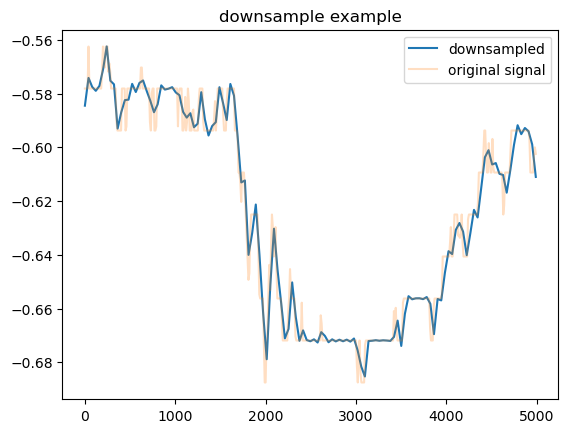

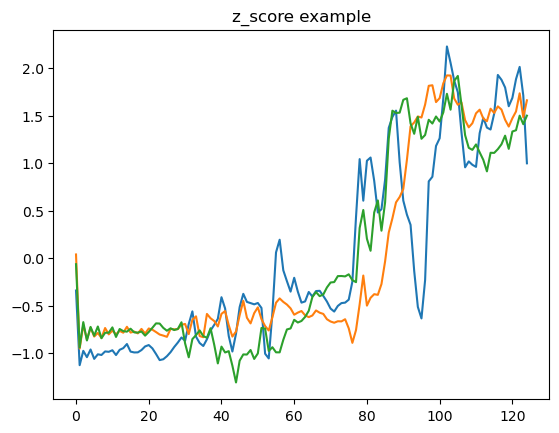

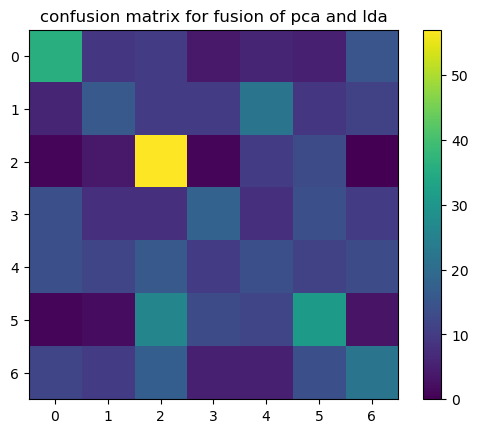

In [9]:
# 2.1
import scipy
import numpy as np
from sklearn import metrics


### Your code begins here ###
training_acc = df_filt_train.loc[df_filt_train['sensor'] == 'acc',:]

test_acc = df_filt_test.loc[df_filt_test['sensor'] == 'acc',:]
###########################################Preprocessing#######################################
# Downsample
training_acc['df_downsamp'] = training_acc['df'].map(lambda x: scipy.signal.resample(x, 125))
test_acc['df_downsamp'] = test_acc['df'].map(lambda x: scipy.signal.resample(x, 125))
plt.figure()
plt.plot(np.linspace(0,4990,125), training_acc['df_downsamp'].iloc[0][:,1], label = 'downsampled')
plt.plot(np.linspace(0,4990,500), training_acc['df'].iloc[0]['acc_0'], label = 'original signal', alpha = 0.25)
plt.title('downsample example')
plt.legend()

# z_score
training_acc['df_z'] = training_acc['df_downsamp'].map(scipy.stats.zscore)
test_acc['df_z'] = test_acc['df_downsamp'].map(scipy.stats.zscore)
plt.figure()
plt.plot(training_acc['df_z'].iloc[100][:,1:4])
plt.title('z_score example')

# filling gap
for i in list(test_acc.index):
    x = test_acc.loc[i, 'df_z']
    
    if len(list(np.argwhere(np.isnan(x)))) != 0:
        print('having nan in test in row {}, so fill it by same row using other acc cols'.format(i))
        test_acc.loc[i, 'df_z'][:,1] = (test_acc.loc[1578, 'df_z'][:,2] + test_acc.loc[1578, 'df_z'][:,3])/2
        
##########################################PCA and LDA########################################
train_acc_red = pca_lda_acc(training_acc)
test_acc_red = pca_lda_acc(test_acc)
print('train_acc_red is after pca and lda reduction. its shape is', train_acc_red.shape)
print('test_acc_red is after pca and lda reduction. its shape is:', test_acc_red.shape)

plt.figure()
confusion_matrix_acc, f1_acc = classifier_pca_lda(test_acc_red,train_acc_red, test_acc, training_acc)
print('f1 score for fusion of pca and lda is',f1_acc)

### Your code ends here ###

In [10]:
def pca_lda_dc(dc, n_comp = 5, need_lda = True):
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    pca = PCA(n_components = n_comp)
    lda = LinearDiscriminantAnalysis(n_components = n_comp)

    # input is acc sensor data
    # output is 5 arrays (length of input acc, 5) for t0, t1, t2, ..., t5
    
    label = dc['exercise_id'] #exercise and trial are classes we want to predict

    t0 = [dc['df_z'].iloc[i][0,1:] for i in range(dc['df_z'].shape[0])]
    t1 = [dc['df_z'].iloc[i][1,1:] for i in range(dc['df_z'].shape[0])]
    t2 = [dc['df_z'].iloc[i][2,1:] for i in range(dc['df_z'].shape[0])]
    t3 = [dc['df_z'].iloc[i][3,1:] for i in range(dc['df_z'].shape[0])]
    t4 = [dc['df_z'].iloc[i][4,1:] for i in range(dc['df_z'].shape[0])]

    t0_pca = pca.fit_transform(t0)
    t1_pca = pca.fit_transform(t1)
    t2_pca = pca.fit_transform(t2)
    t3_pca = pca.fit_transform(t3)
    t4_pca = pca.fit_transform(t4)
    
    output = np.concatenate([t0_pca,t1_pca,t2_pca,t3_pca,t4_pca], axis = 1)
    
    if need_lda:
        t0_lda = lda.fit_transform(t0, label)
        t1_lda = lda.fit_transform(t1, label)
        t2_lda = lda.fit_transform(t2, label)
        t3_lda = lda.fit_transform(t3, label)
        t4_lda = lda.fit_transform(t4, label)
        output = np.concatenate([t0_pca,t1_pca,t2_pca,t3_pca,t4_pca,t0_lda,t1_lda,t2_lda,t3_lda,t4_lda], axis = 1)
    
    return output

test_dc_red is after pca and lda reduction. its shape is: (598, 50)
train_dc_red is after pca and lda reduction. its shape is (1485, 50)
f1 score for fusion of pca and lda is 0.2474


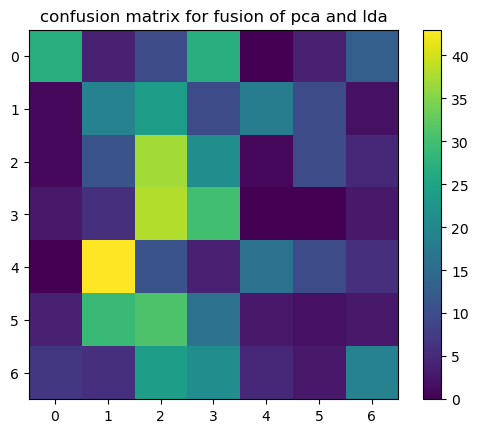

In [11]:
# 2.2
### Your code begins here ###
training_dc = df_filt_train.loc[df_filt_train['sensor'] == 'dc',:]
test_dc = df_filt_test.loc[df_filt_test['sensor'] == 'dc',:]

###########################preprocessing##############################
training_dc['df_z'] = training_dc['df'].map(scipy.stats.zscore)
test_dc['df_z'] = test_dc['df'].map(scipy.stats.zscore)

# filling nan by 0.1
training_dc['df_z'] = training_dc['df_z'].map(lambda x: np.nan_to_num(x, nan = 0.1)) 
test_dc['df_z'] = test_dc['df_z'].map(lambda x: np.nan_to_num(x, nan = 0.1))

#######################pca-lda
train_dc_red = pca_lda_dc(training_dc)
test_dc_red = pca_lda_dc(test_dc)
print('test_dc_red is after pca and lda reduction. its shape is:', test_dc_red.shape)
print('train_dc_red is after pca and lda reduction. its shape is', train_dc_red.shape)

confusion_matrix_dc, f1_dc = classifier_pca_lda(test_dc_red,train_dc_red, test_dc, training_dc)
print('f1 score for fusion of pca and lda is',f1_dc)
### Your code ends here ###

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

In [12]:
def feature_maker_acc(acc_df):
    
    # in this function, we make feature input which has 36 columns:
    # (3*10 for pca acc + 3*1 for acc mean + 3*1 for acc std) = 36 features
    
    # Here for pca acc
    acc_pca = pca_lda_acc(acc_df, n_comp = 10, need_lda=False)
        
    acc0 = [acc_df['df_z'].iloc[i][:,1] for i in range(acc_df['df_z'].shape[0])]
    acc1 = [acc_df['df_z'].iloc[i][:,2] for i in range(acc_df['df_z'].shape[0])]
    acc2 = [acc_df['df_z'].iloc[i][:,3] for i in range(acc_df['df_z'].shape[0])]

    # here for mean of acc
    acc0_mean = np.mean(np.array(acc0), axis = 1).reshape((acc_df.shape[0],1))
    acc1_mean = np.mean(np.array(acc1), axis = 1).reshape((acc_df.shape[0],1))
    acc2_mean = np.mean(np.array(acc2), axis = 1).reshape((acc_df.shape[0],1))
    
    # here for acc std
    acc0_std = np.std(np.array(acc0), axis = 1).reshape((acc_df.shape[0],1))
    acc1_std = np.std(np.array(acc1), axis = 1).reshape((acc_df.shape[0],1))
    acc2_std = np.std(np.array(acc2), axis = 1).reshape((acc_df.shape[0],1))
    
    # here concatinate over cols
    output = np.concatenate([acc_pca,
                             acc0_mean,
                             acc1_mean,
                             acc2_mean,
                             acc0_std,
                             acc1_std,
                             acc2_std],
                             axis = 1) 
    
    return output

In [13]:
def feature_maker_dc(dc_df, more_needed = False):
    
    # in this function, we make feature input which has 50 columns from dc:
    # (5*10 for dc pca) = 50 features
    
    # here pca of dc
    dc_pca = pca_lda_dc(dc_df, n_comp = 10, need_lda=False)
    output = dc_pca
    
    return output

In [14]:
# 3

### Your code begins here ###
########################################Making feature space
train_acc_feat = feature_maker_acc(training_acc)
test_acc_feat = feature_maker_acc(test_acc)

train_dc_feat = feature_maker_dc(training_dc)
test_dc_feat = feature_maker_dc(test_dc)

# Train: attaching along columns feature from dc (50) and acc (36) so features has 56 columns
feature_train = np.concatenate([train_acc_feat, train_dc_feat], axis = 1)

label_train = training_acc['exercise_id']

# Test: attaching along columns feature from dc (50) and acc (36) so features has 56 columns
feature_test = np.concatenate([test_acc_feat, test_dc_feat], axis = 1)
label_test = test_acc['exercise_id']

# Normalizing between 0-1
feature_train_norm = scipy.stats.zscore(feature_train)
feature_test_norm = scipy.stats.zscore(feature_test)

print('shape of feature_train_norm:', feature_train_norm.shape)
print('shape of feature_test_norm:', feature_test_norm.shape)

########################################classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

svm = SVC(kernel='rbf')
svm.fit(feature_train, label_train)
label_pred_svm = svm.predict(feature_test)

f1_svm = metrics.f1_score(label_test, label_pred_svm,average='macro')
cm_svm = metrics.confusion_matrix(label_test, label_pred_svm)
print('f1 score for SVM:', round(f1_svm, 3))
print('confusion matrix for SVM:\n',cm_svm)

GNB = GaussianNB()
GNB.fit(feature_train, label_train)
label_pred_GNB = GNB.predict(feature_test)

f1_GNB = metrics.f1_score(label_test, label_pred_GNB,average='macro')
cm_GNB = metrics.confusion_matrix(label_test, label_pred_GNB)
print('f1 score for GNB:', round(f1_GNB, 3))
print('confusion matrix for GNB:\n',cm_GNB)
### Your code ends here ###

shape of feature_train_norm: (1485, 86)
shape of feature_test_norm: (598, 86)
f1 score for SVM: 0.324
confusion matrix for SVM:
 [[44  0  2  3  0  0 36]
 [ 0 11  3  6 22  5 37]
 [ 1  3 56  2  2 14  8]
 [11  8 25 18  0  0 18]
 [ 2  7 10  1  6 14 50]
 [ 0  5 53  1  0 14 15]
 [ 1  4  5  4  1  7 63]]
f1 score for GNB: 0.55
confusion matrix for GNB:
 [[78  0  0  3  0  0  4]
 [ 0 14 17  0 36  3 14]
 [ 1  0 64  2  5  8  6]
 [19  1 15 38  0  1  6]
 [ 0 32 16  0 30 10  2]
 [ 0  0 34  1  2 46  5]
 [ 0  6  3  0  0  9 67]]


# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

In [18]:
# 4.1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits = 10)

C = [0.1,1.0,10.0,100.0]
gamma = [0.1,0.25,0.5,0.75,1.0,2.0]
parameters_svm = {'gamma':gamma, 'C':C}

n_estimators = [50,100,500,1000]
learning_rate = [0.1,0.25,0.5,0.75,1.0] 
parameters_adb = {'n_estimators':n_estimators, 'learning_rate':learning_rate}

svm = SVC(kernel='rbf', random_state=0)
adb = AdaBoostClassifier(random_state=0)

clf_svm_acc = GridSearchCV(svm, parameters_svm)
clf_adb_acc = GridSearchCV(adb, parameters_adb)

clf_svm_dc = GridSearchCV(svm, parameters_svm)
clf_adb_dc = GridSearchCV(adb, parameters_adb)

best_Cs_acc = []
best_gammas_acc = []
best_lrs_acc = []
best_nest_acc = []

best_Cs_dc = []
best_gammas_dc = []
best_lrs_dc = []
best_nest_dc = []


label_train = np.array(label_train)

for train_index, test_index in skf.split(feature_train, label_train):
    
    clf_svm_acc.fit(feature_train[train_index][:,:36], label_train[train_index])
    clf_adb_acc.fit(feature_train[train_index][:,:36], label_train[train_index])
    
    clf_svm_dc.fit(feature_train[train_index][:,36:], label_train[train_index])
    clf_adb_dc.fit(feature_train[train_index][:,36:], label_train[train_index])
    
    best_Cs_acc.append(clf_svm_acc.best_params_['C'])
    best_gammas_acc.append(clf_svm_acc.best_params_['gamma'])
    best_lrs_acc.append(clf_adb_acc.best_params_['learning_rate'])
    best_nest_acc.append(clf_adb_acc.best_params_['n_estimators'])
    
    best_Cs_dc.append(clf_svm_dc.best_params_['C'])
    best_gammas_dc.append(clf_svm_dc.best_params_['gamma'])
    best_lrs_dc.append(clf_adb_dc.best_params_['learning_rate'])
    best_nest_dc.append(clf_adb_dc.best_params_['n_estimators'])

print('overfitting is probable because training set is used in deriving best paramaters in each run of the above loop')
print('*******************************************')
print('best_Cs_acc:\n',best_Cs_acc) 
print('best_Cs_dc:\n',best_Cs_dc) 
print('best_gammas_acc:\n',best_gammas_acc) 
print('best_gammas_dc:\n',best_gammas_dc) 
print('best_lrs_acc:\n',best_lrs_acc)
print('best_lrs_dc:\n',best_lrs_dc)
print('best_nest_dc:\n',best_nest_dc)
print('best_nest_acc:\n',best_nest_acc)
### Your code ends here ###

overfitting is probable because training set is used in deriving best paramaters in each run of the above loop
*******************************************
best_Cs_acc:
 [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
best_Cs_dc:
 [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
best_gammas_acc:
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
best_gammas_dc:
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
best_lrs_acc:
 [0.1, 0.25, 0.75, 0.25, 0.75, 0.75, 0.5, 0.5, 0.1, 0.1]
best_lrs_dc:
 [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
best_nest_dc:
 [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
best_nest_acc:
 [1000, 500, 1000, 500, 500, 1000, 1000, 1000, 1000, 1000]


In [23]:
# 4.2
### Your code begins here ###
svm_acc = SVC(kernel='rbf', C = 10, gamma = 0.1, probability = True)
adb_acc = AdaBoostClassifier(random_state=0, learning_rate= 0.1, n_estimators = 1000)

svm_dc = SVC(kernel='rbf', C = 10, gamma = 0.1, probability = True)
adb_dc = AdaBoostClassifier(random_state=0, learning_rate= 0.75, n_estimators = 1000)

svm_acc.fit(feature_train[:,:36], label_train)
adb_acc.fit(feature_train[:,:36], label_train)
svm_dc.fit(feature_train[:,36:], label_train)
adb_dc.fit(feature_train[:,36:], label_train)

svm_acc = svm_acc.predict_proba(feature_test[:,:36])
adb_acc = adb_acc.predict_proba(feature_test[:,:36])
svm_dc = svm_dc.predict_proba(feature_test[:,36:])
adb_dc = adb_dc.predict_proba(feature_test[:,36:])

### Your code ends here ###

In [24]:
# 4.3

### Your code begins here ###
svm_acc_svm_dc = np.stack([svm_acc, svm_dc], axis = 2)
adb_acc_adb_dc = np.stack([adb_acc, adb_dc], axis = 2)
svm_acc_adb_dc = np.stack([svm_acc, adb_dc], axis = 2)
svm_dc_adb_acc = np.stack([svm_dc, adb_dc], axis = 2)

label_test = np.array(list(map(int, label_test)))

############################################################
class_sum_svm_acc_svm_dc = np.argmax(np.sum(svm_acc_svm_dc, axis = 2), axis = 1)+1
f1_sum_svm_acc_svm_dc = metrics.f1_score(label_test, class_sum_svm_acc_svm_dc,average='macro')
cm_sum_svm_acc_svm_dc = metrics.confusion_matrix(label_test, class_sum_svm_acc_svm_dc)
print('f1_sum_svm_acc_svm_dc:',round(f1_sum_svm_acc_svm_dc,3))
print('cm_sum_svm_acc_svm_dc:\n',cm_sum_svm_acc_svm_dc)

class_sum_svm_adb_acc_adb_dc = np.argmax(np.sum(adb_acc_adb_dc, axis = 2), axis = 1)+1
f1_sum_svm_adb_acc_adb_dc = metrics.f1_score(label_test, class_sum_svm_adb_acc_adb_dc,average='macro')
cm_sum_svm_adb_acc_adb_dc = metrics.confusion_matrix(label_test, class_sum_svm_adb_acc_adb_dc)
print('f1_sum_svm_adb_acc_adb_dc:',round(f1_sum_svm_adb_acc_adb_dc,3))
print('cm_sum_svm_adb_acc_adb_dc:\n',cm_sum_svm_adb_acc_adb_dc)

class_sum_svm_acc_adb_dc = np.argmax(np.sum(svm_acc_adb_dc, axis = 2), axis = 1)+1
f1_sum_svm_acc_adb_dc = metrics.f1_score(label_test, class_sum_svm_acc_adb_dc,average='macro')
cm_sum_svm_acc_adb_dc = metrics.confusion_matrix(label_test, class_sum_svm_acc_adb_dc)
print('f1_sum_svm_acc_adb_dc:',round(f1_sum_svm_acc_adb_dc,3))
print('cm_sum_svm_acc_adb_dc:\n',cm_sum_svm_acc_adb_dc)

class_sum_svm_dc_adb_acc = np.argmax(np.sum(svm_dc_adb_acc, axis = 2), axis = 1)+1
f1_sum_svm_dc_adb_acc = metrics.f1_score(label_test, class_sum_svm_dc_adb_acc,average='macro')
cm_sum_svm_dc_adb_acc = metrics.confusion_matrix(label_test, class_sum_svm_dc_adb_acc)
print('f1_sum_svm_dc_adb_acc:',round(f1_sum_svm_dc_adb_acc,3))
print('cm_sum_svm_dc_adb_acc:\n',cm_sum_svm_dc_adb_acc)
############################################################
class_min_svm_acc_svm_dc = np.argmax(np.min(svm_acc_svm_dc, axis = 2), axis = 1)+1
f1_min_svm_acc_svm_dc = metrics.f1_score(label_test, class_min_svm_acc_svm_dc,average='macro')
cm_min_svm_acc_svm_dc = metrics.confusion_matrix(label_test, class_min_svm_acc_svm_dc)
print('f1_min_svm_acc_svm_dc:',round(f1_min_svm_acc_svm_dc,3))
print('cm_min_svm_acc_svm_dc:\n',cm_min_svm_acc_svm_dc)

class_min_svm_adb_acc_adb_dc = np.argmax(np.min(adb_acc_adb_dc, axis = 2), axis = 1)+1
f1_min_svm_adb_acc_adb_dc = metrics.f1_score(label_test, class_min_svm_adb_acc_adb_dc,average='macro')
cm_min_svm_adb_acc_adb_dc = metrics.confusion_matrix(label_test, class_min_svm_adb_acc_adb_dc)
print('f1_min_svm_adb_acc_adb_dc:',round(f1_min_svm_adb_acc_adb_dc,3))
print('cm_min_svm_adb_acc_adb_dc:\n',cm_min_svm_adb_acc_adb_dc)

class_min_svm_acc_adb_dc = np.argmax(np.min(svm_acc_adb_dc, axis = 2), axis = 1)+1
f1_min_svm_acc_adb_dc = metrics.f1_score(label_test, class_min_svm_acc_adb_dc,average='macro')
cm_min_svm_acc_adb_dc = metrics.confusion_matrix(label_test, class_min_svm_acc_adb_dc)
print('f1_min_svm_acc_adb_dc:',round(f1_min_svm_acc_adb_dc,3))
print('cm_min_svm_acc_adb_dc:\n',cm_min_svm_acc_adb_dc)

class_min_svm_dc_adb_acc = np.argmax(np.min(svm_dc_adb_acc, axis = 2), axis = 1)+1
f1_min_svm_dc_adb_acc = metrics.f1_score(label_test, class_min_svm_dc_adb_acc,average='macro')
cm_min_svm_dc_adb_acc = metrics.confusion_matrix(label_test, class_min_svm_dc_adb_acc)
print('f1_min_svm_dc_adb_acc:',round(f1_min_svm_dc_adb_acc,3))
print('cm_min_svm_dc_adb_acc:\n',cm_min_svm_dc_adb_acc)
############################################################
class_max_svm_acc_svm_dc = np.argmax(np.max(svm_acc_svm_dc, axis = 2), axis = 1)+1
f1_max_svm_acc_svm_dc = metrics.f1_score(label_test, class_max_svm_acc_svm_dc,average='macro')
cm_max_svm_acc_svm_dc = metrics.confusion_matrix(label_test, class_max_svm_acc_svm_dc)
print('f1_max_svm_acc_svm_dc:',round(f1_max_svm_acc_svm_dc,3))
print('cm_max_svm_acc_svm_dc:\n',cm_max_svm_acc_svm_dc)

class_max_svm_adb_acc_adb_dc = np.argmax(np.max(adb_acc_adb_dc, axis = 2), axis = 1)+1
f1_max_svm_adb_acc_adb_dc = metrics.f1_score(label_test, class_max_svm_adb_acc_adb_dc,average='macro')
cm_max_svm_adb_acc_adb_dc = metrics.confusion_matrix(label_test, class_max_svm_adb_acc_adb_dc)
print('f1_max_svm_adb_acc_adb_dc:',round(f1_max_svm_adb_acc_adb_dc,3))
print('cm_max_svm_adb_acc_adb_dc:\n',cm_max_svm_adb_acc_adb_dc)

class_max_svm_acc_adb_dc = np.argmax(np.max(svm_acc_adb_dc, axis = 2), axis = 1)+1
f1_max_svm_acc_adb_dc = metrics.f1_score(label_test, class_max_svm_acc_adb_dc,average='macro')
cm_max_svm_acc_adb_dc = metrics.confusion_matrix(label_test, class_max_svm_acc_adb_dc)
print('f1_max_svm_acc_adb_dc:',round(f1_max_svm_acc_adb_dc,3))
print('cm_max_svm_acc_adb_dc:\n',cm_max_svm_acc_adb_dc)

class_max_svm_dc_adb_acc = np.argmax(np.max(svm_dc_adb_acc, axis = 2), axis = 1)+1
f1_max_svm_dc_adb_acc = metrics.f1_score(label_test, class_max_svm_dc_adb_acc,average='macro')
cm_max_svm_dc_adb_acc = metrics.confusion_matrix(label_test, class_max_svm_dc_adb_acc)
print('f1_max_svm_dc_adb_acc:',round(f1_max_svm_dc_adb_acc,3))
print('cm_max_svm_dc_adb_acc:\n',cm_max_svm_dc_adb_acc)
############################################################
class_prod_svm_acc_svm_dc = np.argmax(np.prod(svm_acc_svm_dc, axis = 2), axis = 1)+1
f1_prod_svm_acc_svm_dc = metrics.f1_score(label_test, class_prod_svm_acc_svm_dc,average='macro')
cm_prod_svm_acc_svm_dc = metrics.confusion_matrix(label_test, class_prod_svm_acc_svm_dc)
print('f1_prod_svm_acc_svm_dc:',round(f1_prod_svm_acc_svm_dc,3))
print('cm_prod_svm_acc_svm_dc:\n',cm_prod_svm_acc_svm_dc)

class_prod_adb_acc_adb_dc = np.argmax(np.prod(adb_acc_adb_dc, axis = 2), axis = 1)+1
f1_prod_adb_acc_adb_dc = metrics.f1_score(label_test, class_prod_adb_acc_adb_dc,average='macro')
cm_prod_prod_adb_acc_adb_dc = metrics.confusion_matrix(label_test, class_prod_adb_acc_adb_dc)
print('f1_prod_adb_acc_adb_dc:',round(f1_prod_adb_acc_adb_dc,3))
print('cm_prod_prod_adb_acc_adb_dc:\n',cm_prod_prod_adb_acc_adb_dc)

class_prod_svm_acc_adb_dc = np.argmax(np.prod(svm_acc_adb_dc, axis = 2), axis = 1)+1
f1_prod_svm_acc_adb_dc = metrics.f1_score(label_test, class_prod_svm_acc_adb_dc,average='macro')
cm_prod_svm_acc_adb_dc = metrics.confusion_matrix(label_test, class_prod_svm_acc_adb_dc)
print('f1_prod_svm_acc_adb_dc:',round(f1_prod_svm_acc_adb_dc,3))
print('cm_prod_svm_acc_adb_dc:\n',cm_prod_svm_acc_adb_dc)

class_prod_svm_dc_adb_acc = np.argmax(np.prod(svm_dc_adb_acc, axis = 2), axis = 1)+1
f1_prod_svm_dc_adb_acc = metrics.f1_score(label_test, class_prod_svm_dc_adb_acc,average='macro')
cm_prod_svm_dc_adb_acc = metrics.confusion_matrix(label_test, class_prod_svm_dc_adb_acc)
print('f1_prod_svm_dc_adb_acc:',round(f1_prod_svm_dc_adb_acc,3))
print('cm_prod_svm_dc_adb_acc:\n',cm_prod_svm_dc_adb_acc)
### Your code ends here ###

f1_sum_svm_acc_svm_dc: 0.036
cm_sum_svm_acc_svm_dc:
 [[ 0  0 85  0  0  0  0]
 [ 0  0 84  0  0  0  0]
 [ 0  0 86  0  0  0  0]
 [ 0  1 79  0  0  0  0]
 [ 0  0 90  0  0  0  0]
 [ 0  0 88  0  0  0  0]
 [ 0  0 85  0  0  0  0]]
f1_sum_svm_adb_acc_adb_dc: 0.426
cm_sum_svm_adb_acc_adb_dc:
 [[37  0  0 37  0  1 10]
 [ 3 22 11  2 31  4 11]
 [ 5  5 56  5  4  4  7]
 [ 4  0 25 51  0  0  0]
 [ 0 14 14  0 49 12  1]
 [ 1  3 44  2 10 12 16]
 [ 9  4 22  5  7  2 36]]
f1_sum_svm_acc_adb_dc: 0.162
cm_sum_svm_acc_adb_dc:
 [[ 4  0 20 61  0  0  0]
 [ 0  1 43  0 40  0  0]
 [ 0  0 82  0  4  0  0]
 [ 0  0 71  9  0  0  0]
 [ 0  0 31  0 59  0  0]
 [ 0  0 73  0 10  0  5]
 [ 0  1 69  1 10  4  0]]
f1_sum_svm_dc_adb_acc: 0.197
cm_sum_svm_dc_adb_acc:
 [[ 7  0 61  0  0  0 17]
 [ 0 10 41  0 28  0  5]
 [ 0  1 82  0  2  0  1]
 [ 0  0 80  0  0  0  0]
 [ 0 13 32  0 45  0  0]
 [ 0  1 64  0  7  0 16]
 [ 0  2 64  0  4  0 15]]
f1_min_svm_acc_svm_dc: 0.036
cm_min_svm_acc_svm_dc:
 [[ 0  0 85  0  0  0  0]
 [ 0  0 84  0  0  0  0]
 [ 

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [ ]:
# 5.1

### Your code begins here ###

### Your code ends here ###

In [ ]:
# 5.2

### Your code begins here ###

### Your code ends here ###